In [1]:
from glob import glob
excel_files = glob('data/excel/*.xlsx')
excel_files

['data/excel\\20210123_mom.xlsx',
 'data/excel\\20210124_mom.xlsx',
 'data/excel\\20210125_mom.xlsx',
 'data/excel\\20210126_mom.xlsx',
 'data/excel\\20210127_mom.xlsx',
 'data/excel\\20210128_mom.xlsx',
 'data/excel\\20210129_mom.xlsx',
 'data/excel\\20210130_mom.xlsx',
 'data/excel\\20210131_mom.xlsx',
 'data/excel\\20210201_mom.xlsx']

In [2]:
import pandas as pd
df = pd.read_excel(excel_files[0], sheet_name='MISO', skiprows=4, nrows=17, index_col=0, usecols=range(7))

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df

,1/24/21 HE 20,1/25/21 HE 20**,1/26/21 HE 20**,1/27/21 HE 20**,1/28/21 HE 09**,1/29/21 HE 09**
RESOURCE COMMITTED,72247.3,67591.5,76485.2,77937.5,74683.8,67994.4
RESOURCE UNCOMMITTED,31091.0,52089.8,42849.8,42446.9,45850.4,53283.5
Uncommitted >16 hr,2383.8,14741.5,10861.6,11006.6,13077.6,18652.0
Uncommitted 12-16 hr,3475.0,7554.5,6432.0,5490.0,4923.0,5748.0
Uncommitted 8-12 hr,4908.9,6723.5,5818.5,5498.5,6128.5,6452.5
Uncommitted 4-8 hr,3466.5,4977.5,3730.5,4154.6,4179.5,4380.5
Uncommitted < 4 hr,16856.8,18092.8,16007.2,16297.2,17541.8,18050.5
Renewable Forecast,5373.7,14352.5,6350.8,4666.5,7529.2,14353.6
MISO resources available,108712.0,134033.8,125685.8,125050.9,128063.4,135631.5
"NSI (+ export, - import)",-2362.0,-2851.0,-2851.0,-2851.0,-3166.0,-3166.0


In [4]:
loads = df.loc['Projected Load', :].to_list()
loads

[77528.0, 81575.0, 82841.0, 81974.0, 82897.0, 83236.0]

In [5]:
wind = df.loc['Renewable Forecast', :].to_list()
wind

[5373.7, 14352.5, 6350.8, 4666.5, 7529.2, 14353.6]

In [6]:
load_labels = [f'load_d{d}' for d in range(1, 7)]
wind_labels = [f'wind_d{d}' for d in range(1, 7)]
load_labels

['load_d1', 'load_d2', 'load_d3', 'load_d4', 'load_d5', 'load_d6']

In [7]:
list(zip(load_labels + wind_labels, loads + wind))

[('load_d1', 77528.0),
 ('load_d2', 81575.0),
 ('load_d3', 82841.0),
 ('load_d4', 81974.0),
 ('load_d5', 82897.0),
 ('load_d6', 83236.0),
 ('wind_d1', 5373.7),
 ('wind_d2', 14352.5),
 ('wind_d3', 6350.8),
 ('wind_d4', 4666.5),
 ('wind_d5', 7529.2),
 ('wind_d6', 14353.6)]

In [8]:
data_dict = {col: val for col, val in zip(load_labels + wind_labels, loads + wind)}

In [9]:
date = pd.to_datetime(excel_files[0].split('\\')[-1].split('_')[0])

In [10]:
df = pd.DataFrame.from_records(data=data_dict, index=[date])
df

,load_d1,load_d2,load_d3,load_d4,load_d5,load_d6,wind_d1,wind_d2,wind_d3,wind_d4,wind_d5,wind_d6
2021-01-23,77528.0,81575.0,82841.0,81974.0,82897.0,83236.0,5373.7,14352.5,6350.8,4666.5,7529.2,14353.6


In [11]:
df.append(df)

,load_d1,load_d2,load_d3,load_d4,load_d5,load_d6,wind_d1,wind_d2,wind_d3,wind_d4,wind_d5,wind_d6
2021-01-23,77528.0,81575.0,82841.0,81974.0,82897.0,83236.0,5373.7,14352.5,6350.8,4666.5,7529.2,14353.6
2021-01-23,77528.0,81575.0,82841.0,81974.0,82897.0,83236.0,5373.7,14352.5,6350.8,4666.5,7529.2,14353.6


In [12]:
import os

def extract_miso_forecasts(path):
    """
    Takes a filepath to .xlsx MISO MOM reports and extracts wind and load forecasts.
    Saves data to an Excel file - miso_forecasts.xlsx, and returns the DataFrame.
    """
    excel_files = glob(os.path.join(path, '*.xlsx'))
    full_forecast_df = None
    for file in excel_files:
        df = pd.read_excel(file, sheet_name='MISO', skiprows=4, nrows=17, index_col=0, usecols=range(7))
        
        # get data
        loads = df.loc['Projected Load', :].to_list()
        wind = df.loc['Renewable Forecast', :].to_list()
        
        # make column labels
        load_labels = [f'load_d{d}' for d in range(1, 7)]
        wind_labels = [f'wind_d{d}' for d in range(1, 7)]
        
        # create and append dataframe
        data_dict = {col: val for col, val in zip(load_labels + wind_labels, loads + wind)}
        date = pd.to_datetime(file.split('\\')[-1].split('_')[0])
        forecast_df = pd.DataFrame.from_records(data=data_dict, index=[date])
        if full_forecast_df is None:
            full_forecast_df = forecast_df.copy()
        else:
            full_forecast_df = full_forecast_df.append(forecast_df)
    
    full_forecast_df.sort_index(inplace=True)
    full_forecast_df.to_excel('miso_forecasts.xlsx')
    return full_forecast_df

In [13]:
df = extract_miso_forecasts('data/excel/')

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
df.head()

,load_d1,load_d2,load_d3,load_d4,load_d5,load_d6,wind_d1,wind_d2,wind_d3,wind_d4,wind_d5,wind_d6
2021-01-23,77528.0,81575.0,82841.0,81974.0,82897.0,83236.0,5373.7,14352.5,6350.8,4666.5,7529.2,14353.6
2021-01-24,83310.0,82300.0,82452.0,84568.0,84231.0,72855.0,15996.5,7030.6,5094.1,7496.4,5232.0,16207.2
2021-01-25,83135.0,84945.0,86705.0,86325.0,73520.0,73509.0,8529.6,4371.5,9566.0,7825.3,15260.2,12907.8
2021-01-26,84898.0,88174.0,86816.0,74929.0,75048.0,80868.0,4179.6,9625.7,7896.6,14690.1,10564.0,4949.9
2021-01-27,89361.0,87024.0,75566.0,75378.0,81915.0,83146.0,9498.3,10986.1,13680.6,7576.2,4346.1,7028.9


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

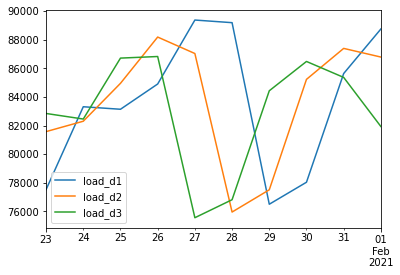

In [16]:
df[['load_d1', 'load_d2', 'load_d3']].plot()

<AxesSubplot:>

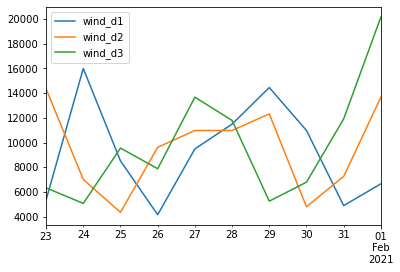

In [17]:
df[['wind_d1', 'wind_d2', 'wind_d3']].plot()

In [18]:
df['wind_d2'].shift()

2021-01-23        NaN
2021-01-24    14352.5
2021-01-25     7030.6
2021-01-26     4371.5
2021-01-27     9625.7
2021-01-28    10986.1
2021-01-29    10990.8
2021-01-30    12325.0
2021-01-31     4826.3
2021-02-01     7277.6
Name: wind_d2, dtype: float64

In [19]:
plot_df = pd.concat([df['wind_d1'], df['wind_d2'].shift(), df['wind_d3'].shift(2)], axis=1)
plot_df.index += pd.DateOffset(1)
plot_df

,wind_d1,wind_d2,wind_d3
2021-01-24,5373.7,NaN,NaN
2021-01-25,15996.5,14352.5,NaN
2021-01-26,8529.6,7030.6,6350.8
2021-01-27,4179.6,4371.5,5094.1
2021-01-28,9498.3,9625.7,9566.0
2021-01-29,11501.3,10986.1,7896.6
2021-01-30,14455.9,10990.8,13680.6
2021-01-31,10986.3,12325.0,11801.1
2021-02-01,4915.3,4826.3,5274.5
2021-02-02,6676.5,7277.6,6809.1


<AxesSubplot:>

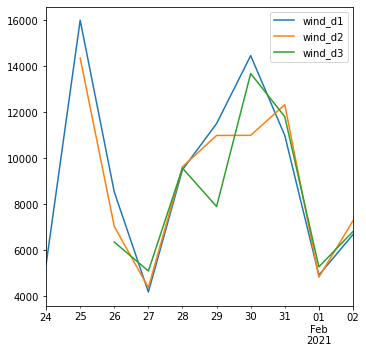

In [20]:
f = plt.figure(figsize=(5.5, 5.5))
f.patch.set_facecolor('w')  # sets background color behind axis labels
plot_df.plot(ax=plt.gca())

<AxesSubplot:>

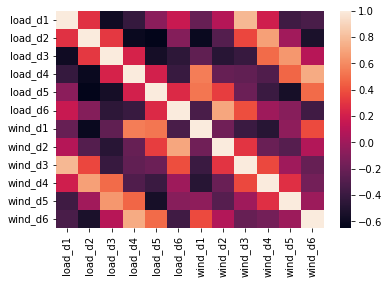

In [21]:
sns.heatmap(df.corr())

In [22]:
from openpyxl import load_workbook
wb = load_workbook(excel_files[0])
wb.sheetnames

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


['MISO',
 'NORTH',
 'CENTRAL',
 'NORTH+CENTRAL',
 'SOUTH',
 'WIND UNCERTAINTY',
 'LOAD UNCERTAINTY',
 'OUTAGE']

`conda install python-levenshtein` or `pip install python-levenshtein`

In [23]:
from Levenshtein import ratio

In [24]:
ratio('miso', 'miso')

1.0

In [25]:
miso_sheetname = [name for name in wb.sheetnames if (ratio(name.lower(), 'miso') > 0.8)][0]
miso_sheetname

'MISO'

In [26]:
miso = wb[miso_sheetname]

In [27]:
for row in miso.iter_rows():
    for cell in row:
        if ratio(str(cell.value).lower(), 'renewable forecast') > 0.8:
            print(cell.value)
            print(f'row, column: {cell.row}, {cell.column}')

Renewable Forecast
row, column: 13, 1
